# Homework 5 - Li Ruixue (resubmission)
## 1. Multinomial logistic regression and cross validation
### (a) Use a multinomial logistic regression model of the following form with the following linear predictor j for j = 1; 2 (the baseline class is j = 3).
 
### Report your two sets of estimated coeffcients for j = 1 and j = 2. Report your error rates (1 - precision) on the test set using the code below. Which category of cultivar is the model best at predicting? Is the most accurately predicted category the one with the most observations?

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from pylab import rcParams
from sklearn.model_selection import LeaveOneOut, KFold
import statsmodels.api as sm
from scipy.interpolate import LSQUnivariateSpline
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

/Users/liruixue/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/liruixue/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
wine = pd.read_csv('data/strongdrink.txt')
wine = wine[['cultivar', 'alco', 'malic', 'tot_phen', 'color_int']]
wine.head()
len(wine)

176

In [3]:
wine.isnull().sum()

cultivar     0
alco         0
malic        0
tot_phen     0
color_int    0
dtype: int64

In [4]:
wine.cultivar.value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [5]:
X = wine[['alco', 'malic', 'tot_phen', 'color_int']]
y = wine[['cultivar']]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25, random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
MultLogReg.fit(X_train, y_train)
y_pred = MultLogReg.predict(X_test)
for i in range(0,2):
    print('For j = ' + str(i+1) )
    print('cultivar = ' + str(round(MultLogReg.intercept_[i],2))+' + '+
         str(round(MultLogReg.coef_[i][0], 2))+' alco + '+
         str(round(MultLogReg.coef_[i][1], 2))+' malic + '+
         str(round(MultLogReg.coef_[i][2], 2))+' tot_phen + '+
         str(round(MultLogReg.coef_[i][3], 2))+' color_int')
    print()

print(classification_report(y_test, y_pred))
y_test = np.array([y_test['cultivar']])
print('Validation set MSE = ', (y_test != y_pred).astype(int).mean())

For j = 1
cultivar = -24.01 + 1.7 alco + -0.27 malic + 1.22 tot_phen + 0.02 color_int

For j = 2
cultivar = 22.8 + -1.47 alco + -0.33 malic + 0.66 tot_phen + -0.92 color_int

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

Validation set MSE =  0.045454545454545456


/Users/liruixue/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The error rates are:  
j = 1: 1 - 0.87 = 0.13  
j = 2: 1 - 1 = 0  
j = 3: 1 - 1 = 0  
The category with the most observations is 2, which is perfectly predicted in this dataset, but so is category 3, which has the least observations. Meanwhile, category 1 which has the median number of observations was not predicted as well, so it's hard to say based on this test that the most accurately predicted category is the one with the most observations

### (b) Perform a leave-one-out cross validation (LOOCV) with the model from part (a). Report your error rates (1 - precision) for each category? How do your error rates compare to those from part (a)? Report your LOOCV estimate for the test MSE as the average MSE, where yi is the left out observation from each test set.

In [6]:
Xvars = X.values
yvals = y.values

In [7]:
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)
y_test_vec = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec[test_index] = (y_test != y_pred).astype(int)
    y_pred_vec[test_index] = y_pred
    y_test_vec[test_index] = y_test

print(classification_report(y_test_vec, y_pred_vec))
MSE_loo = MSE_vec.mean()
print('test estimate MSE loocv=', MSE_loo)

/Users/liruixue/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176

test estimate MSE loocv= 0.07954545454545454


The error rates are:    
j = 1: 1 - 0.90 = 0.10    
j = 2: 1 - 0.91 = 0.09  
j = 3: 1 - 0.96 = 0.04  
The average error is bigger than part (a), so is the MSE.

### (c) Perform a k-fold cross validation in which the data are divided into k = 4 groups. Use the following code. Report your error rates (1 - precision) for each category. How do your error rates compare to those from parts (a) and (b)? Report your k-fold estimate for the test MSE as the average MSE.

In [8]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
y_pred_vec = np.array([])
y_test_vec = np.array([])

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    print('\n\n')
    print('Group ', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred_vec = np.append(y_pred_vec, y_pred)
    y_test_vec = np.append(y_test_vec, y_test)
    y_test = np.reshape(y_test, (44,1))
    y_pred = np.reshape(y_pred, (44,1))
    MSE_vec_kf[k_ind] = ((y_test != y_pred).astype(int)).mean()
    print(classification_report(y_test, y_pred))
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('\n\n')
print(classification_report(y_test_vec, y_pred_vec))
print('test estimate MSE k-fold=', MSE_kf)




Group  0
             precision    recall  f1-score   support

          1       0.71      1.00      0.83        12
          2       1.00      0.75      0.86        24
          3       0.78      0.88      0.82         8

avg / total       0.88      0.84      0.84        44

MSE for test set 0  is 0.1590909090909091



Group  1
             precision    recall  f1-score   support

          1       1.00      0.76      0.87        17
          2       0.69      1.00      0.81        11
          3       1.00      0.94      0.97        16

avg / total       0.92      0.89      0.89        44

MSE for test set 1  is 0.11363636363636363



Group  2


/Users/liruixue/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          1       0.94      1.00      0.97        15
          2       0.94      0.94      0.94        16
          3       1.00      0.92      0.96        13

avg / total       0.96      0.95      0.95        44

MSE for test set 2  is 0.045454545454545456



Group  3
             precision    recall  f1-score   support

          1       0.88      1.00      0.94        15
          2       1.00      0.90      0.95        20
          3       1.00      1.00      1.00         9

avg / total       0.96      0.95      0.95        44

MSE for test set 3  is 0.045454545454545456



             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176

test estimate MSE k-fold= 0.09090909090909091


The error rates are:    
j = 1: 1 - 0.87 = 0.13    
j = 2: 1 - 0.91 = 0.09  
j = 3: 1 - 0.96 = 0.04
It's similar to Leave One Out, and bigger than multinomial logistic regression.

## 2. Splines and interpolation

### (a) Create a scatterplot of the data with age on the x-axis and Coolness Index on the y-axis. Label your axes, and give the plot a title.

In [9]:
cool = pd.read_csv('data/CoolIndex.txt', names = ['age', 'coolness'])
age = cool['age']

In [10]:
cool.head()

,age,coolness
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


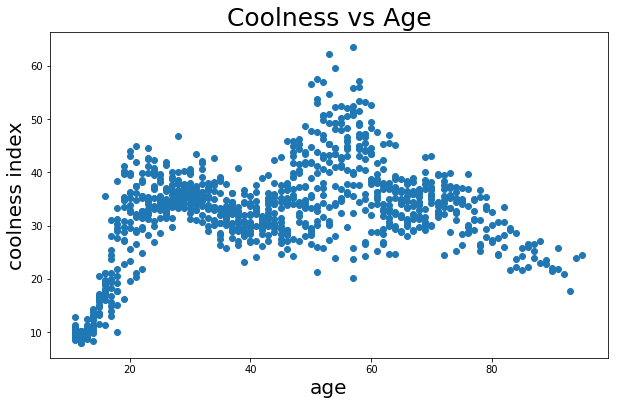

In [11]:
plt.figure(figsize = (10, 6))
plt.scatter(cool.age, cool.coolness)
plt.xlabel('age', fontsize = 20)
plt.ylabel('coolness index', fontsize = 20)
plt.title('Coolness vs Age', fontsize = 25)
plt.show()

### (b) Use ordinary least squares (OLS) regression to t a stepwise function to these data. Use 5 bins [11; 22), [22; 40), [40; 59), [59; 77), [77; 95]. Remem- ber that your dummy variables must be integer type (0, 1), not boolean type (True, False). Plot this step function on top of the scatterplot of the data from part (a). Label your axes, include a legend, and give the plot a title. Report your estimated step function values for each bin [1; 2; 3; 4; 5]. What is the predicted coolness of a 73-year old from the stepwise function?

In [12]:
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age <= 95)).astype(int)
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.head()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [13]:
reg = sm.OLS(endog=cool['coolness'], exog=X_step, missing='drop')
reg_results = reg.fit()
y_pred = reg_results.predict(X_step)
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          3.73e-114
Time:                        17:31:07   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.562     35.746      0.0

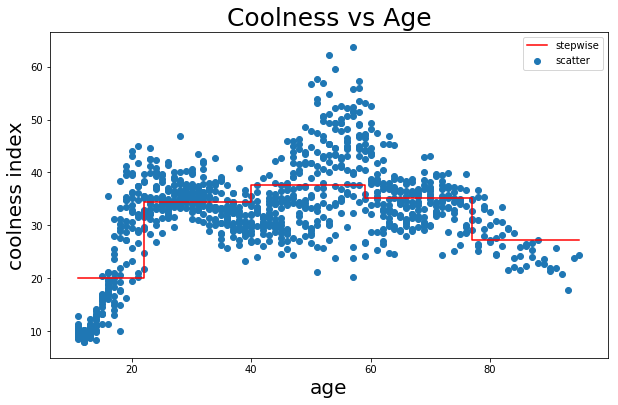

In [14]:
age_step = np.array([11, 22, 40, 59, 77, 95])
cool_step = np.append(reg_results.params[0], reg_results.params)
plt.figure(figsize = (10, 6))
plt.step(age_step, cool_step, color = 'r', label = 'stepwise')
plt.scatter(cool.age, cool.coolness, label = 'scatter')
plt.xlabel('age', fontsize = 20)
plt.ylabel('coolness index', fontsize = 20)
plt.title('Coolness vs Age', fontsize = 25)
plt.legend(loc = 'upper right')
plt.show()

In [15]:
for i in range(len(reg_results.params)):
    print('b' + str(i) + ' is ' + '{:.2f}'.format(reg_results.params[i]))

b0 is 20.10
b1 is 34.48
b2 is 37.64
b3 is 35.23
b4 is 27.30


In [16]:
y_73 = reg_results.predict([0,0,0,1,0])
print('Predicted coolness of a 73-year old is ' + '{:.2f}'.format(y_73[0]))

Predicted coolness of a 73-year old is 35.23


### (c) Fit a linear spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LQUnivariateSpline function with k = 1 (linear) and the knots equal to t =[22,40,59,77]. Plot your continuous linear spline against a scatterplot of the data from part (a) and the estimated step function from part (b). Label your axes, include a legend, and give the plot a title. What is the predicted coolness of a 73-year old from the linear spline?

In [17]:
t = [22, 40, 59, 77]
spl_linear = LSQUnivariateSpline(cool.age.values, cool.coolness.values, t, k=1)
y_pred_linear = spl_linear(cool.age)

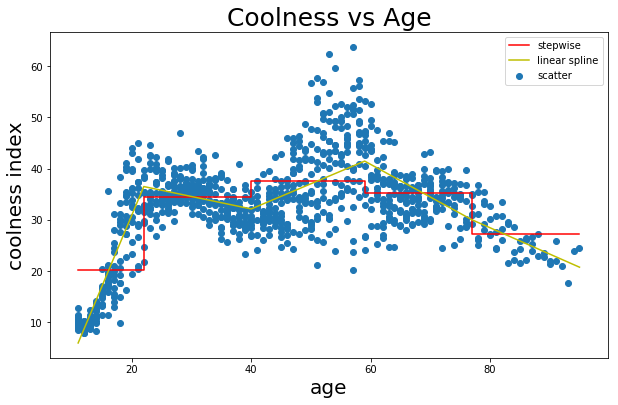

In [18]:
plt.figure(figsize = (10, 6))
plt.step(age_step, cool_step, color = 'r', label = 'stepwise')
plt.scatter(cool.age, cool.coolness, label = 'scatter')
plt.plot(cool.age, y_pred_linear, color = 'y', label = 'linear spline')
plt.xlabel('age', fontsize = 20)
plt.ylabel('coolness index', fontsize = 20)
plt.title('Coolness vs Age', fontsize = 25)
plt.legend(loc = 'upper right')
plt.show()

In [19]:
y_73 = spl_linear(73)
print('Predicted coolness of a 73-year old is ' + '{:.2f}'.format(y_73))

Predicted coolness of a 73-year old is 32.54


### (d) Fit a cubic spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LQUnivariateSpline function with k = 3 (cubic) and the knots equal to t =[22,40,59,77]. Plot your continuous cubic spline against a scatterplot of the data from part (a) and the es- timated step function from part (b), and the linear spline from part (c). Label your axes, include a legend, and give the plot a title. What is the predicted coolness of a 73-year old from the cubic spline?

In [20]:
spl_cubic = LSQUnivariateSpline(cool.age.values, cool.coolness.values, t, k=3)
y_pred_cubic = spl_cubic(cool.age)

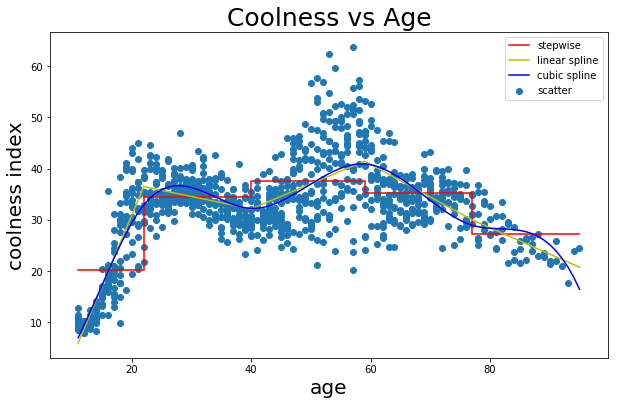

In [21]:
plt.figure(figsize = (10, 6))
plt.step(age_step, cool_step, color = 'r', label = 'stepwise')
plt.scatter(cool.age, cool.coolness, label = 'scatter')
plt.plot(cool.age, y_pred_linear, color = 'y', label = 'linear spline')
plt.plot(cool.age, y_pred_cubic, color = 'b', label = 'cubic spline')
plt.xlabel('age', fontsize = 20)
plt.ylabel('coolness index', fontsize = 20)
plt.title('Coolness vs Age', fontsize = 25)
plt.legend(loc = 'upper right')
plt.show()

In [22]:
y_73 = spl_cubic(73)
print('Predicted coolness of a 73-year old is ' + '{:.2f}'.format(y_73))

Predicted coolness of a 73-year old is 31.26
